In [3]:
pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 58.1 MB/s eta 0:00:00


In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from dmba import classificationSummary
from dmba.metric import AIC_score
from sklearn import metrics
import dmba
import matplotlib.pyplot as plt

In [14]:
#Logistic Regression:
# 1 Read FlightDelays.csv
flight_data = pd.read_csv("FlightDelays.csv")
#flight_data.drop(columns='')




In [31]:
#2 Preprocess and clean the data!
# Preprocessing
flight_data.columns = [c.replace(' ', '_') for c in flight_data.columns]
flight_data

,SUN_MON,DEP_TIME_BLK,CRS_DEP_TIME,CARRIER,DEST,DISTANCE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,Flight_Status
0,0,7,7,2,2,214,1742,1,0,5,9,0
1,0,18,18,3,1,213,4784,1,0,5,9,0
2,0,8,8,3,2,214,4954,1,0,5,9,0
3,0,11,11,3,2,214,4960,1,0,5,9,0
4,0,16,16,3,2,214,4970,1,0,5,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2196,0,16,16,1,1,228,7816,2,1,5,30,1
2197,0,6,6,2,2,214,1740,1,1,5,30,1
2198,0,7,7,2,2,214,1742,1,1,5,30,1
2199,0,8,8,2,2,214,1744,1,1,5,30,1


In [20]:
flight_data.Flight_Status = flight_data.Flight_Status.astype(pd.CategoricalDtype())
flight_data.CARRIER = flight_data.CARRIER.astype(pd.CategoricalDtype())
flight_data.DEST = flight_data.DEST.astype(pd.CategoricalDtype())
flight_data.ORIGIN = flight_data.ORIGIN.astype(pd.CategoricalDtype())
flight_data.Flight_Status = flight_data.Flight_Status.cat.codes
flight_data.CARRIER = flight_data.CARRIER.cat.codes
flight_data.DEST = flight_data.DEST.cat.codes
flight_data.ORIGIN= flight_data.ORIGIN.cat.codes

In [21]:
# 3 Partition your data into training and test sets, with the test set having 30% of the observations.
y = flight_data["Flight_Status"]
X = flight_data.drop(columns='Flight_Status')
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=2)

In [22]:
# 4 Run a logistic regression model with Flight Status as the dependent variable and all other variables as independent variables!

logit_reg = LogisticRegression()
logit_reg.fit(train_X,train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

print('AIC', AIC_score(test_y, logit_reg.predict(test_X), df = len(train_X.columns) + 1))


intercept  -0.0010179717153169189
        SUN_MON  DEP_TIME_BLK  CRS_DEP_TIME   CARRIER     DEST  DISTANCE  \
coeff -0.022414     -0.011915     -0.011915  0.045161  0.02096  0.004382   

         FL_NUM    ORIGIN   Weather  DAY_WEEK  DAY_OF_MONTH  
coeff -0.000051 -0.004229 -0.006563 -0.130615      0.034578  
AIC 1159.457189346998


In [30]:
# 5- Evaluate your model's performance on both training and test sets, and report the results!
print("Train_Accuracy")
classificationSummary(train_y, logit_reg.predict(train_X))
print("Test_Accuracy")
classificationSummary(test_y, logit_reg.predict(test_X))


Train_Accuracy
Confusion Matrix (Accuracy 0.6890)

       Prediction
Actual   0   1
     0 113 435
     1  44 948
Test_Accuracy
Confusion Matrix (Accuracy 0.6747)

       Prediction
Actual   0   1
     0  48 195
     1  20 398


In [ ]:
# 5  Evaluate your model's performance on both training and test sets, and report the results!
y_pred_proba = logit_reg.predict_proba(test_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba)

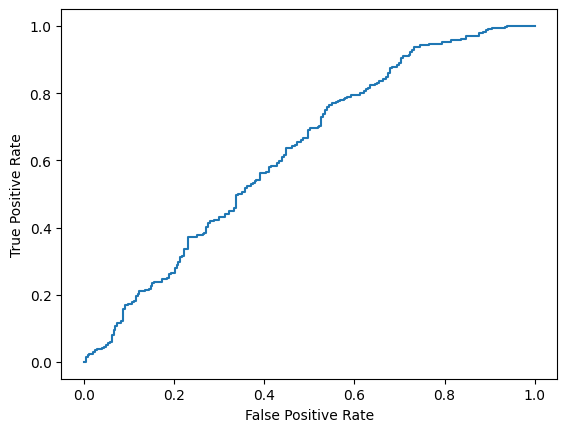

In [34]:
# 5  Evaluate your model's performance on both training and test sets, and report the results!
#create ROC curve\
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
#6- Do you observe any overfitting issues? Why?
# ANS  NO Overfitting issues, As the difference between training set and test set accuracy_score is not significant
